In [1]:
import sys
import os.path
# Addition to path to unlock relative import to the madhatter package
sys.path.append(os.path.abspath(os.path.pardir))
import matplotlib.pyplot as plt

from madhatter.benchmark import CreativityBenchmark

# Read the text
with open('carroll-alice.txt') as f:
    text = f.read()

# Initialize the benchmark
bench = CreativityBenchmark(text, 'Alice in Wonderland')


In [2]:
# We have easy access methods for relevant segmentations of the text
bench.sents
bench.words
bench.tokenized_sents
bench.tagged_words
bench.tagged_sents


[[('[', 'ADJ'),
  ('Alice', 'NOUN'),
  ("'s", 'PRT'),
  ('Adventures', 'NOUN'),
  ('in', 'ADP'),
  ('Wonderland', 'NOUN'),
  ('by', 'ADP'),
  ('Lewis', 'NOUN'),
  ('Carroll', 'NOUN'),
  ('1865', 'NUM'),
  (']', 'NOUN'),
  ('CHAPTER', 'NOUN'),
  ('I', 'PRON'),
  ('.', '.')],
 [('Down', 'ADP'),
  ('the', 'DET'),
  ('Rabbit-Hole', 'ADJ'),
  ('Alice', 'NOUN'),
  ('was', 'VERB'),
  ('beginning', 'VERB'),
  ('to', 'PRT'),
  ('get', 'VERB'),
  ('very', 'ADV'),
  ('tired', 'ADJ'),
  ('of', 'ADP'),
  ('sitting', 'VERB'),
  ('by', 'ADP'),
  ('her', 'PRON'),
  ('sister', 'NOUN'),
  ('on', 'ADP'),
  ('the', 'DET'),
  ('bank', 'NOUN'),
  (',', '.'),
  ('and', 'CONJ'),
  ('of', 'ADP'),
  ('having', 'VERB'),
  ('nothing', 'NOUN'),
  ('to', 'PRT'),
  ('do', 'VERB'),
  (':', '.'),
  ('once', 'ADV'),
  ('or', 'CONJ'),
  ('twice', 'VERB'),
  ('she', 'PRON'),
  ('had', 'VERB'),
  ('peeped', 'VERB'),
  ('into', 'ADP'),
  ('the', 'DET'),
  ('book', 'NOUN'),
  ('her', 'PRON'),
  ('sister', 'NOUN'),
  ('was',

In [3]:
# We have easy access to things like frequency distributions over the whole book
bench.book_postag_counts()

FreqDist({'.': 6169, 'VERB': 6161, 'NOUN': 5410, 'PRON': 3261, 'DET': 3156, 'ADP': 2840, 'ADV': 2267, 'ADJ': 1492, 'PRT': 1323, 'CONJ': 1046, ...})

In [24]:
# Similarly, we can make use of the metrics without having to create the benchmark object. If we choose to instead integrate with a NLP library like SpaCy.

from madhatter import metrics, utils
from nltk import word_tokenize

sent = "The quick brown fox jumped over the lazy dog."
metrics.concreteness(word_tokenize(sent), utils.get_concreteness_df()) # type: ignore

[1.43, 2.89, 4.48, 4.97, None, 2.67, 4.85]

In [13]:
# Finally, we can put it all together by generating an overall Report object containing metrics for the whole text like so:

report = bench.report()

print(report)

# This object can later be used inside a machine learning pipeline to learn features about text to be used in classification and other tasks. See experiment.ipynb for examples.

Report took ~0.306s
BookReport(title=Alice in Wonderland
	nwords=32368
	mean_wl=3.587555610479486
	mean_sl=87.26892307692307
	mean_tokenspersent=20.61169230769231
	prop_contentwords=0.05020390509144834
	mean_conc=3.1467837965144474
	mean_img=3.712773669711445
	mean_freq=3.0479534446198984
	prop_pos={'ADJ': 0.044545291694034754, 'NOUN': 0.16152146653131905, 'VERB': 0.18394339284647995}
	surprisal=None
	predictability=None)


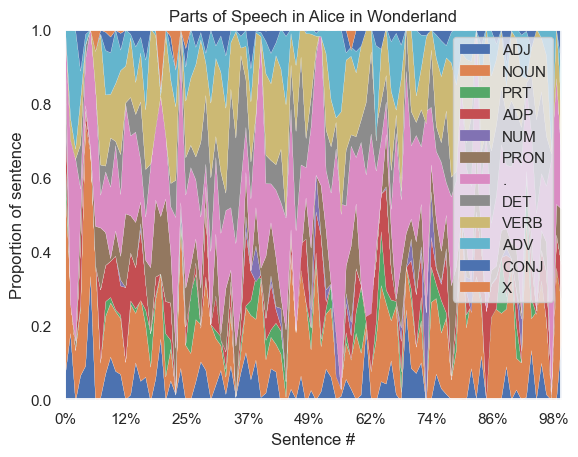

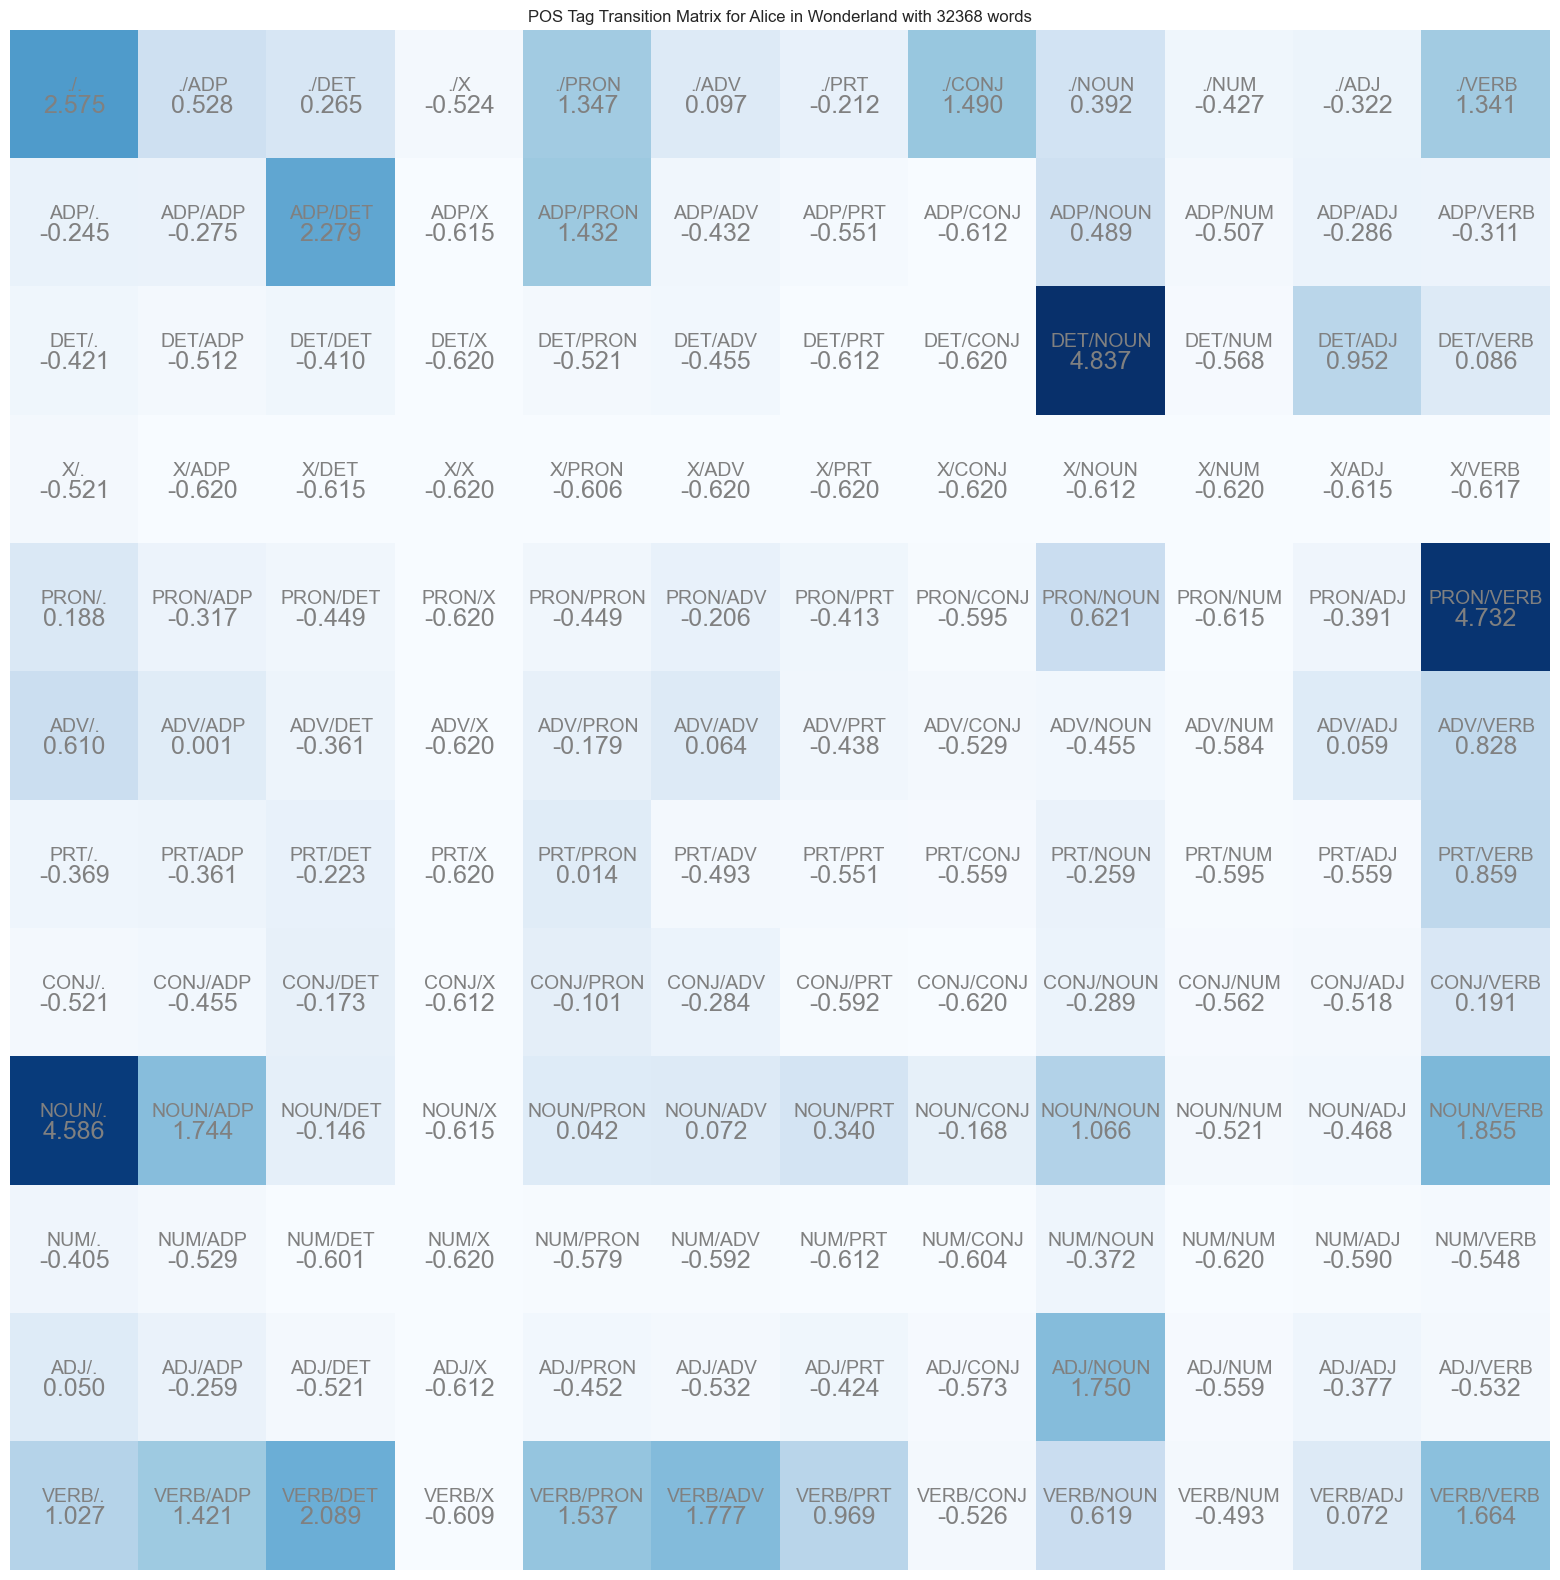

In [7]:
# We also have access to a few different preset plotting functions

bench.plot_postag_distribution()
bench.plot_transition_matrix()

In [2]:
# We also have access to a variety of different metrics about the text:

conc = bench.concreteness_ratings()

# Shows all words along with their respective concreteness ratings
list(zip(bench.lemmas(), conc))

[('[', None),
 ('Alice', None),
 ('Adventures', 2.39),
 ('Wonderland', None),
 ('Lewis', None),
 ('Carroll', 3.43),
 (']', None),
 ('CHAPTER', None),
 ('Rabbit-Hole', 2.56),
 ('Alice', 2.38),
 ('be', 3.0),
 ('begin', 4.8),
 ('get', 4.0),
 ('very', 4.78),
 ('tired', 2.21),
 ('sit', 2.93),
 ('sister', 3.37),
 ('bank', 4.9),
 ('have', 4.0),
 ('nothing', 3.56),
 ('do', 4.52),
 ('once', 3.28),
 ('twice', None),
 ('have', 2.78),
 ('peep', 4.9),
 ('book', 1.97),
 ('sister', None),
 ('be', 4.52),
 ('read', 3.28),
 ('have', 1.68),
 ('picture', 2.5),
 ('conversation', 3.33),
 ("'and", 1.34),
 ('be', 4.31),
 ('use', 3.92),
 ('book', 2.67),
 ('thought', 2.28),
 ('Alice', 2.77),
 ('picture', 1.75),
 ('conversation', 2.04),
 ('be', 2.67),
 ('consider', None),
 ('own', 1.12),
 ('mind', 2.25),
 ('as', 2.38),
 ('well', 3.82),
 ('could', 5.0),
 ('hot', 1.84),
 ('day', 3.89),
 ('make', 4.93),
 ('feel', 3.93),
 ('very', 4.9),
 ('sleepy', 4.31),
 ('stupid', 3.2),
 ('pleasure', 2.21),
 ('make', 1.43),
 ('da

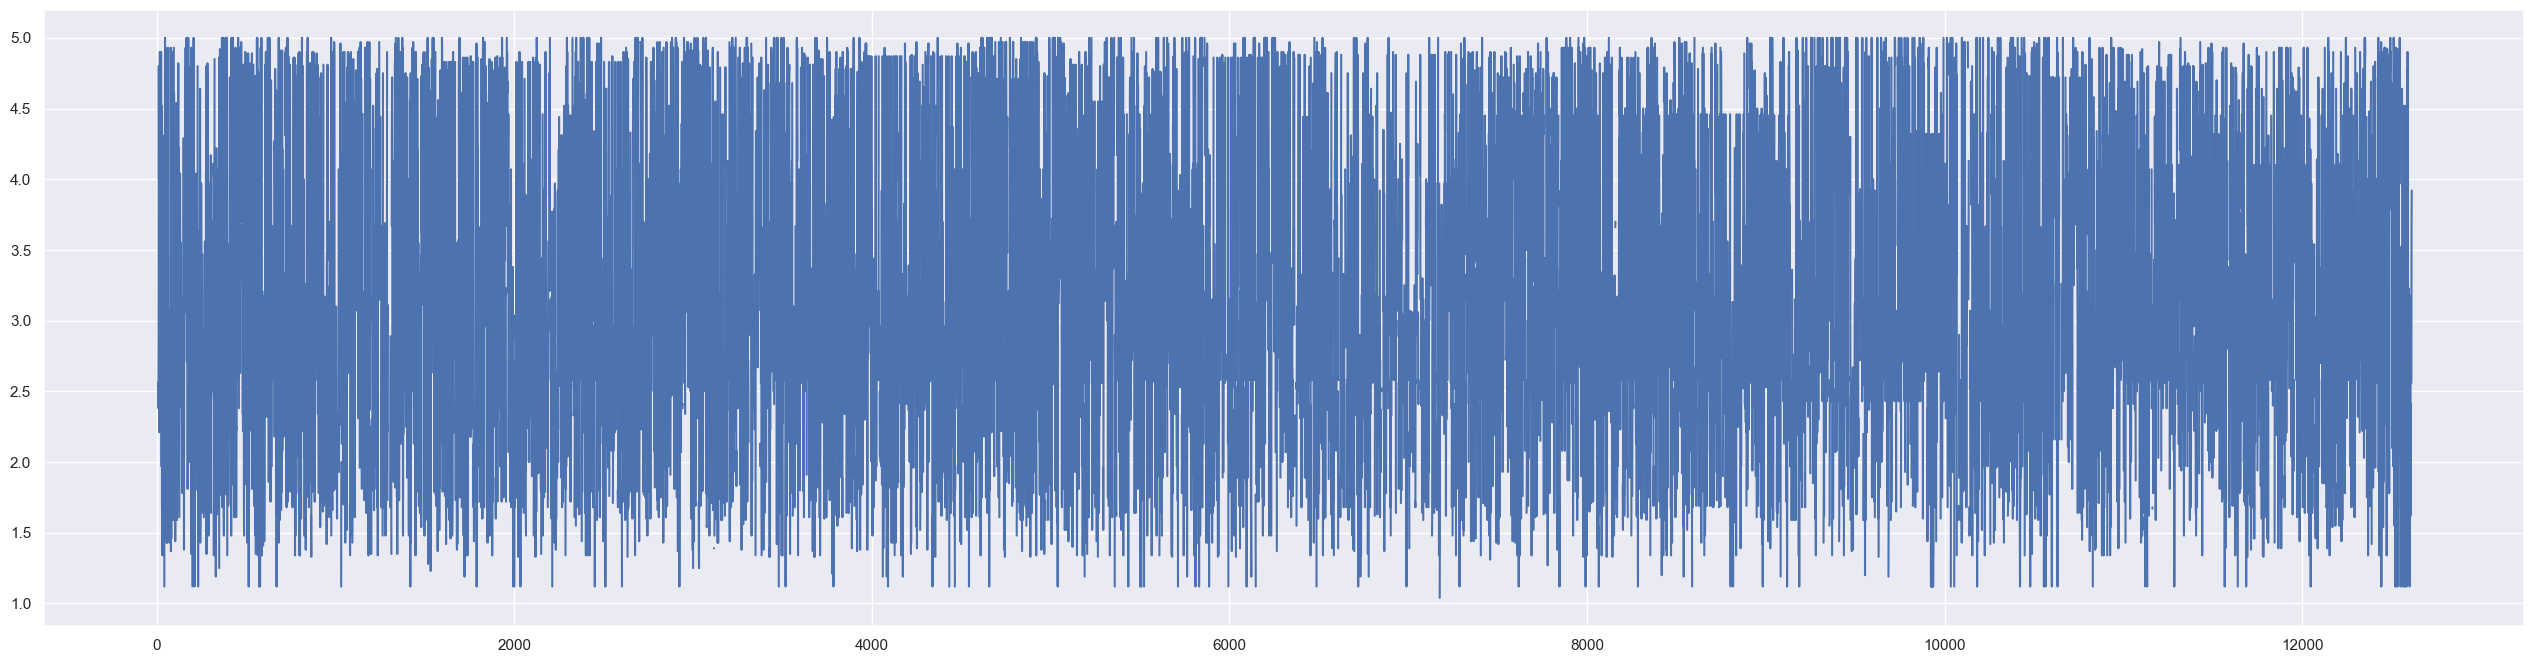

In [15]:
# We can also implement our own plots with the functions available to us

import matplotlib.pyplot as plt

plt.figure(figsize=(32,8))
plt.plot(conc)

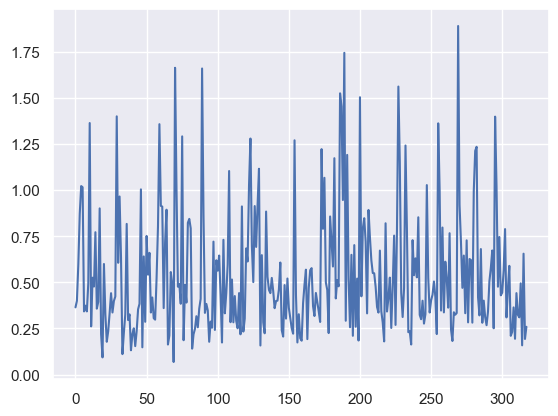

In [19]:
# We can also showcase more advanced metrics utilizing LLMs:
# Note the spikes, those are moments in the context with high predictability. Predictability is a measure of the LLM's confidence in a given context.
# Low points signify low predictability -- that is, the expected word is not as predictable by the model, while high points mean that the model found less difficulty predicting the text.

plt.figure(figsize=(20,8))
plt.plot(report.predictability)

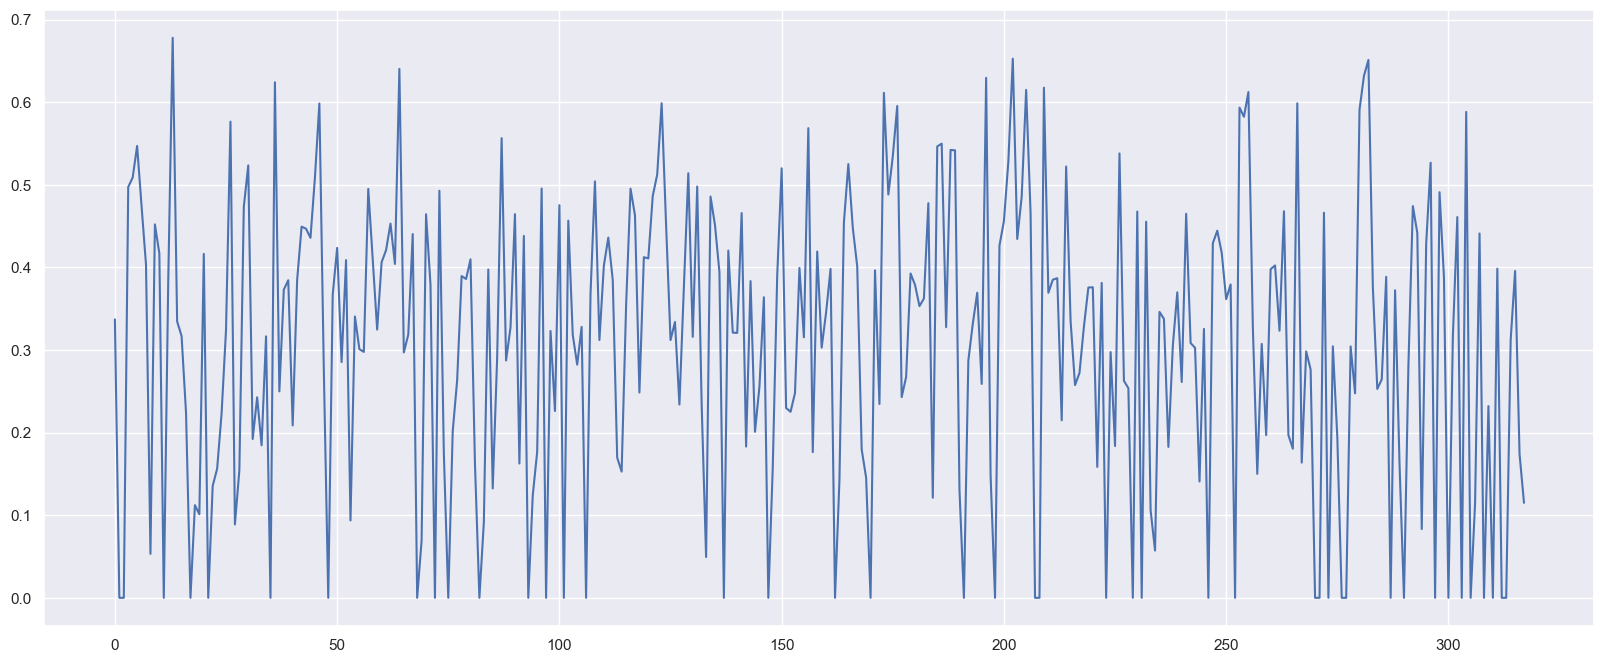

In [21]:
# Note the surprisal metric. It shows how similar or dissimilar potential contextual replacements are. It is strictly defined as the average of the top K likeliest replacements of the word in the given context. Higher scores mean that the word was expected and not too unusual. Lower scores mean that the word was "surprising" in this context, and suggested replacements had low or no similarity with the actual word being used.

plt.figure(figsize=(20,8))
plt.plot(report.surprisal)

In [8]:
%%timeit
list(i for i in range(10))

774 ns ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


BookReport(title=Alice in Wonderland
	nwords=32368
	mean_wl=3.587555610479486
	mean_sl=87.26892307692307
	mean_tokenspersent=20.61169230769231
	prop_contentwords=0.05020390509144834
	mean_conc=3.1467837965144474
	mean_img=3.712773669711445
	mean_freq=3.0479534446198984
	prop_pos={}
	surprisal=None
	predictability=None)


(<Figure size 1280x960 with 1 Axes>, <PolarAxesSubplot: >)

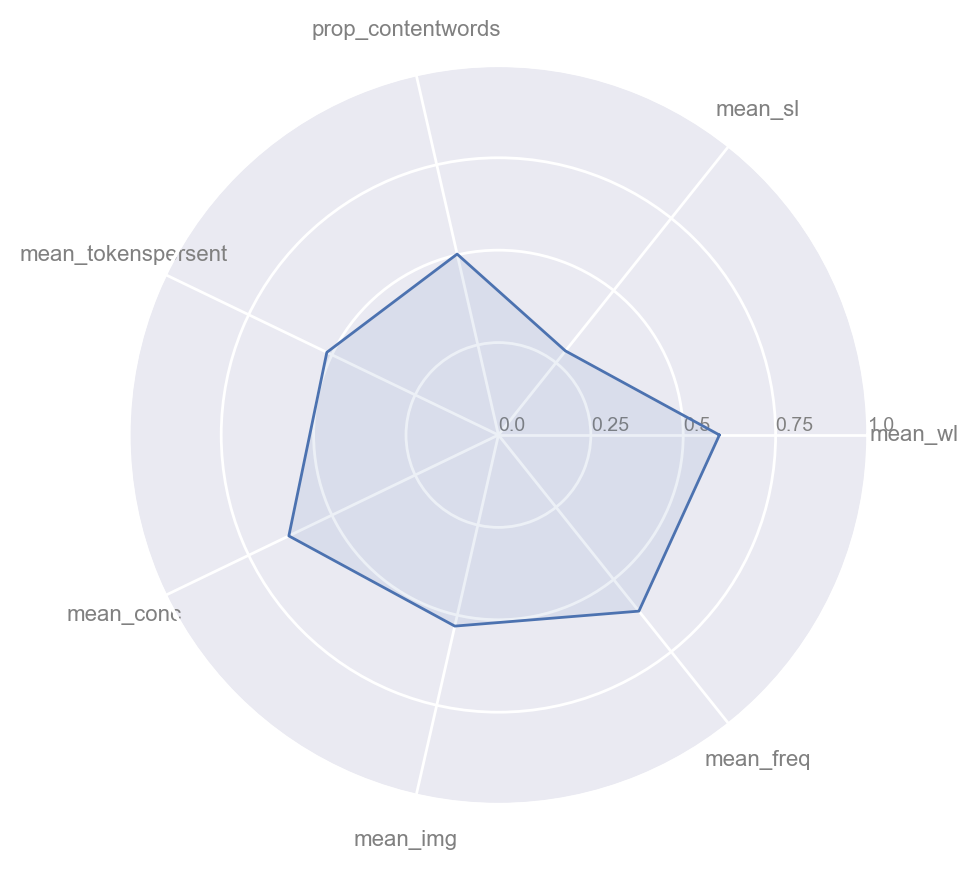

In [8]:
from madhatter.benchmark import BookReport

# an arbitary norm based on some observations for max possible values in data, can be improved
norm = BookReport(title='', nwords=20_000, mean_wl=6, mean_sl=300, mean_tokenspersent=40, prop_contentwords=0.10, mean_conc=5, mean_img=7, mean_freq=5, prop_pos=None, surprisal=None, predictability=None)

bench.plot_report(global_dist = norm,
    categories=["mean_wl", "mean_sl", "prop_contentwords", "mean_tokenspersent", "mean_conc", "mean_img", "mean_freq"],
    include_llm = False, print_time=False, include_pos=False
)

In [5]:
from madhatter.models import predict_tokens, default_model

model, tok = default_model()
res = predict_tokens("the quick brown fox jumped over the", "fox", model, tok, return_tokens=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
import pandas as pd

print(pd.DataFrame(list(zip(res[0], res[1]))).to_latex(index=False)
)

\begin{tabular}{rl}
\toprule
       0 &       1 \\
\midrule
9.453183 &    eyes \\
8.290386 &     man \\
8.150213 &   foxie \\
8.013705 &     cat \\
7.838038 &    hair \\
7.734682 &     one \\
7.429658 &    head \\
7.249254 &     dog \\
7.240383 &    wolf \\
7.148504 &     boy \\
7.053892 &    bear \\
7.009429 &     guy \\
6.624822 &    coat \\
6.575042 & foxling \\
6.563181 &    form \\
6.529060 &     eye \\
6.483809 &    girl \\
6.432149 &   thing \\
6.413284 &   shape \\
6.271477 &    bird \\
\bottomrule
\end{tabular}



/var/folders/jh/2h78bdyj1qzfbls2j1yfbv9c0000gn/T/ipykernel_85823/3504924371.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(list(zip(res[0], res[1]))).to_latex(index=False)


In [13]:

import numpy as np

np.gradient(res[0])

array([-1.16279697, -0.65148497, -0.13834047, -0.1560874 , -0.13951159,
       -0.20419025, -0.24271417, -0.09463739, -0.05037475, -0.09324551,
       -0.06953764, -0.214535  , -0.2171936 , -0.03082061, -0.0229907 ,
       -0.0396862 , -0.04845548, -0.03526211, -0.08033633, -0.14180756])